In [1]:
from ncut_feature import *

In [2]:
base_dir = "/Users/sam/Desktop/Codes/machine_perception/Final/feature_maps"
x_feature_maps, c_feature_maps = get_feature_maps(base_dir)

In [3]:
batch_no = 0
steps = list(x_feature_maps.keys())
tokens = list(c_feature_maps[steps[0]][batch_no].keys())

num_eig = 50
num_steps = len(steps)
num_tokens = len(tokens)
x_size = x_feature_maps[steps[0]][batch_no].shape[0] # 400
x_height = 20
x_width = x_size // x_height # 20
x_dim = x_feature_maps[steps[0]][batch_no].shape[1] # 1536
c_dim = c_feature_maps[steps[0]][batch_no][tokens[0]].shape[0] # 1536

print(f"Image Feature Map Size: ({x_height}x{x_width})x{x_dim} = {x_size}x{x_dim}")
print(f"Text Feature Map Size: {num_tokens}x{c_dim}")

Image Feature Map Size: (20x20)x1536 = 400x1536
Text Feature Map Size: 20x1536


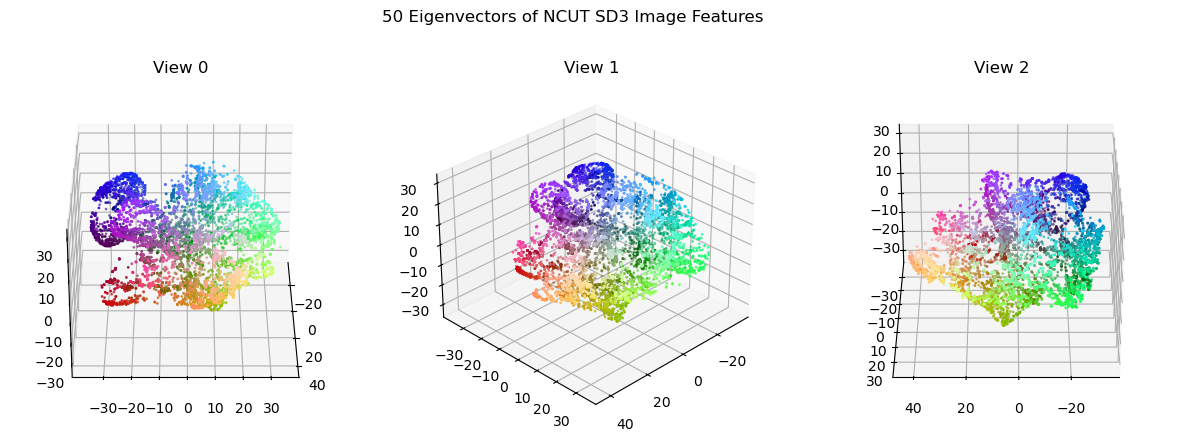

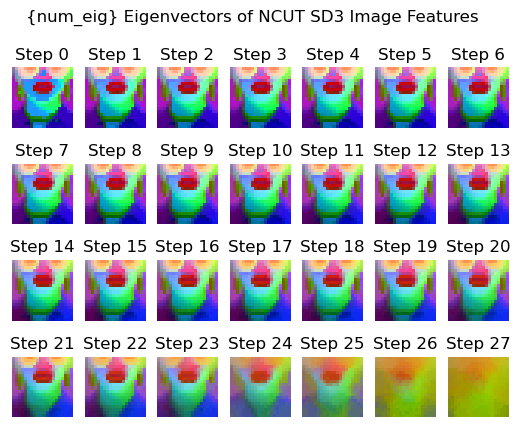

In [4]:
x_features = group_x_features(x_feature_maps, batch_no) # [num_steps * x_size, x_dim]
x_eign_vec, x_eign_val = ncut_features(x_features, num_eig)
x_3d, x_rgb = rgb_from_tsne_3d(x_eign_vec)
plot_3d(x_3d, x_rgb, f"{num_eig} Eigenvectors of NCUT SD3 Image Features", num_nodes=num_steps*x_size)
x_features_rgb = x_rgb.reshape(num_steps, x_height, x_width, 3).numpy()
plot_images(x_features_rgb, "{num_eig} Eigenvectors of NCUT SD3 Image Features")

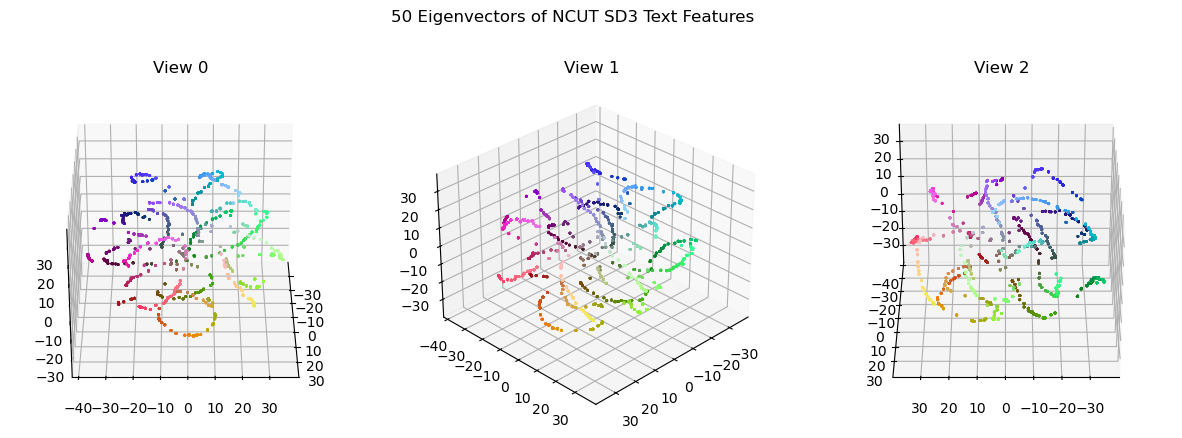

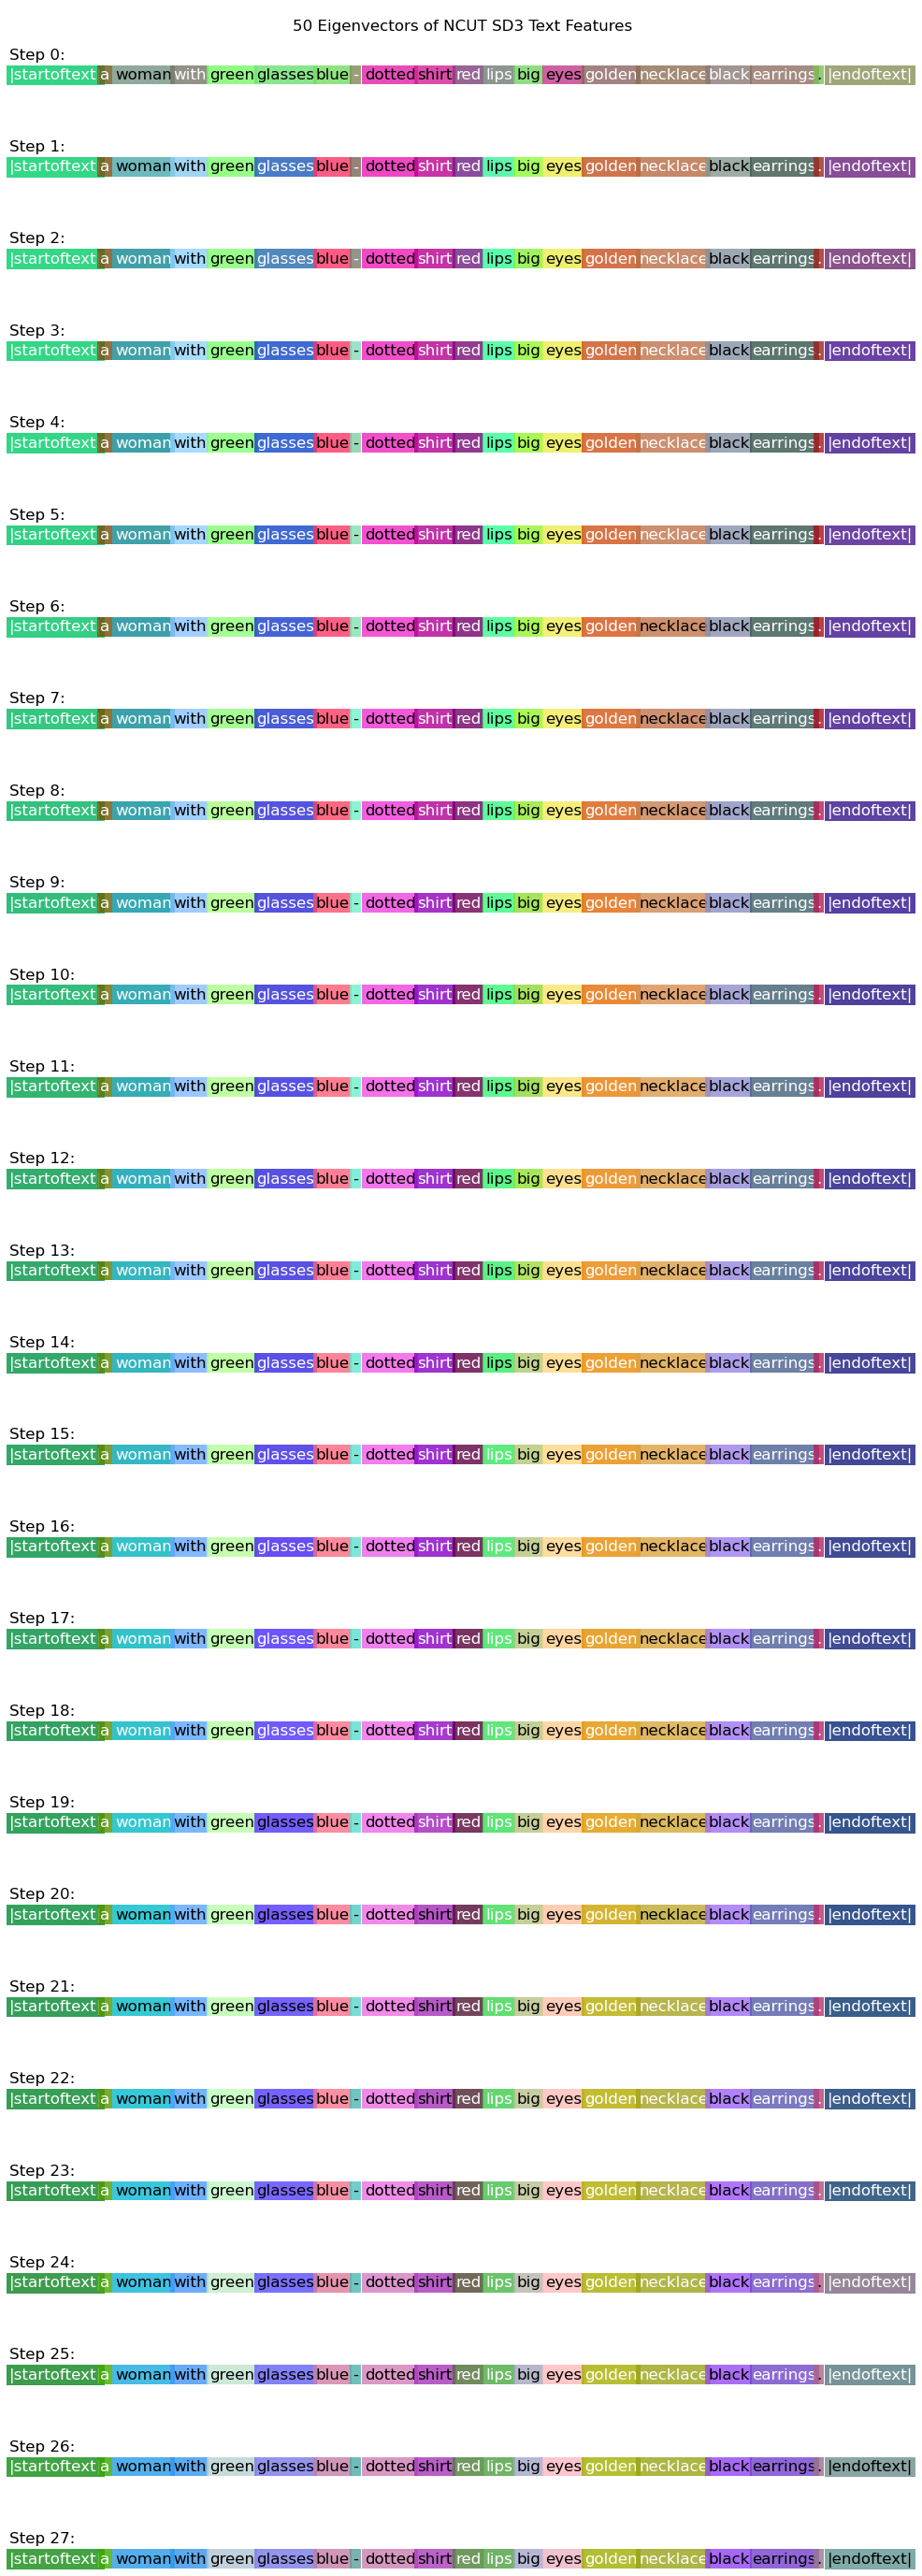

In [5]:
c_features = group_c_features(c_feature_maps, batch_no) # [num_steps * num_tokens, c_dim]
c_eign_vec, c_eign_val = ncut_features(c_features, num_eig)
c_3d, c_rgb = rgb_from_tsne_3d(c_eign_vec)
plot_3d(c_3d, c_rgb, f"{num_eig} Eigenvectors of NCUT SD3 Text Features", num_nodes=num_steps*num_tokens)
c_features_rgb = c_rgb.reshape(num_steps, num_tokens, 3).numpy()
plot_texts(c_features_rgb, tokens, f"{num_eig} Eigenvectors of NCUT SD3 Text Features")

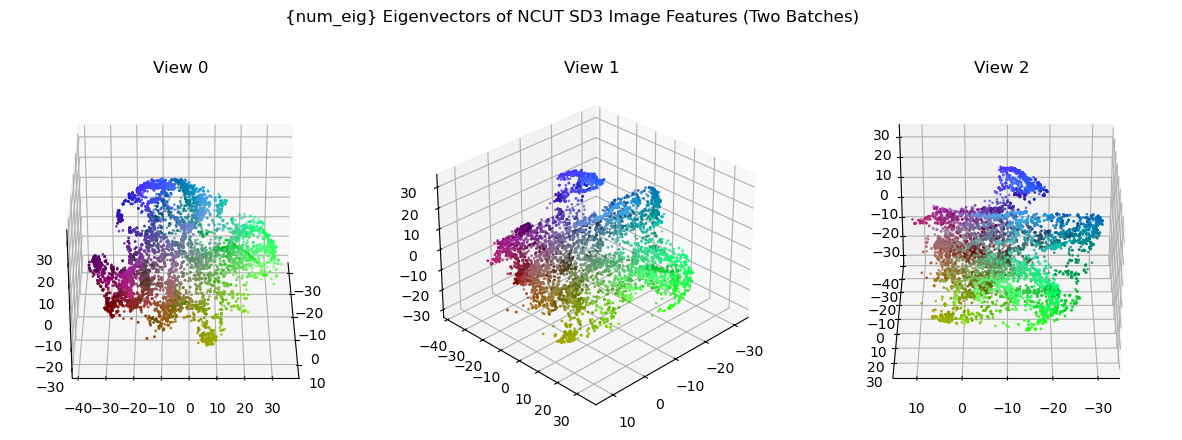

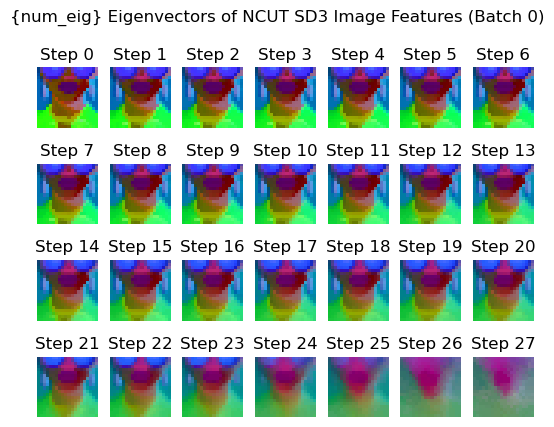

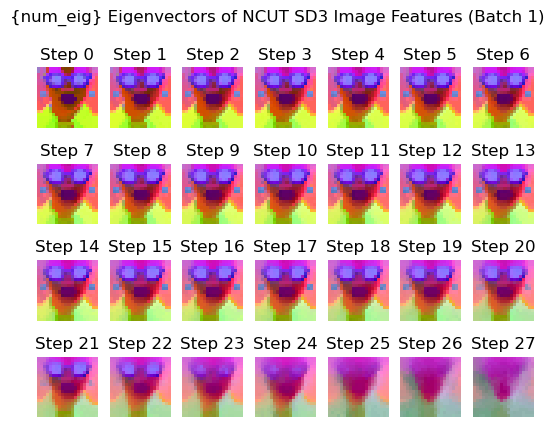

In [6]:
x_features_0 = group_x_features(x_feature_maps, 0)
x_features_1 = group_x_features(x_feature_maps, 1)
x_features_01 = torch.cat((x_features_0, x_features_1), dim=0)
# x_features_01 = torch.stack((x_features_0, x_features_1), dim=1).reshape(-1, x_dim)
eigenvectors, eigenvalues = ncut_features(x_features_01, num_eig)
x_3d_01, rgb_01 = rgb_from_tsne_3d(eigenvectors)
plot_3d(x_3d_01, rgb_01, "{num_eig} Eigenvectors of NCUT SD3 Image Features (Two Batches)", num_nodes=x_features.shape[0])
# rgb_0 = rgb_01.chunk(2)[0]
# rgb_1 = rgb_01.chunk(2)[1]
rgb_0 = rgb_01[:num_steps*x_size]
rgb_1 = rgb_01[num_steps * x_size:]
# rgb_0 = rgb_01[::2]
# rgb_1 = rgb_01[1::2]
x_features_rgb_0 = rgb_0.reshape(num_steps, x_height, x_width, 3)
x_features_rgb_1 = rgb_1.reshape(num_steps, x_height, x_width, 3)
plot_images(x_features_rgb_0, "{num_eig} Eigenvectors of NCUT SD3 Image Features (Batch 0)", show=False)
plot_images(x_features_rgb_1, "{num_eig} Eigenvectors of NCUT SD3 Image Features (Batch 1)", show=False)
plt.show()

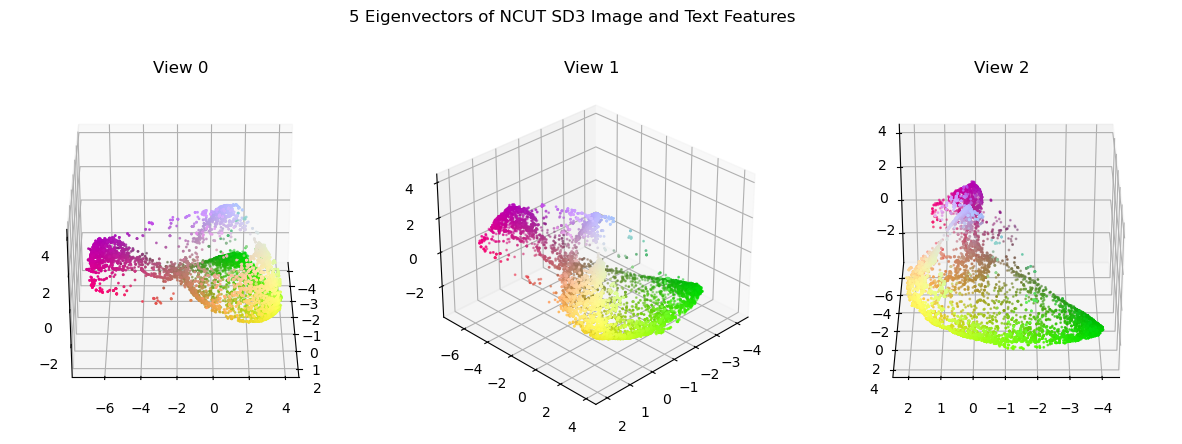

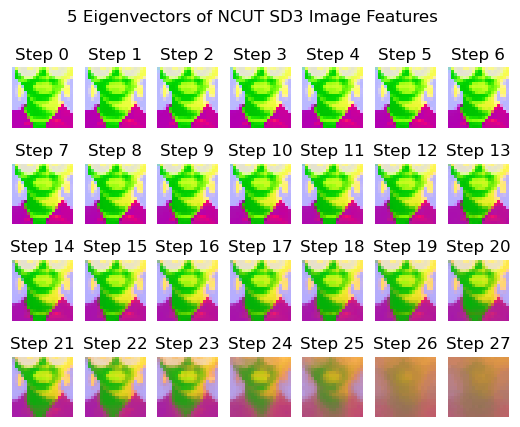

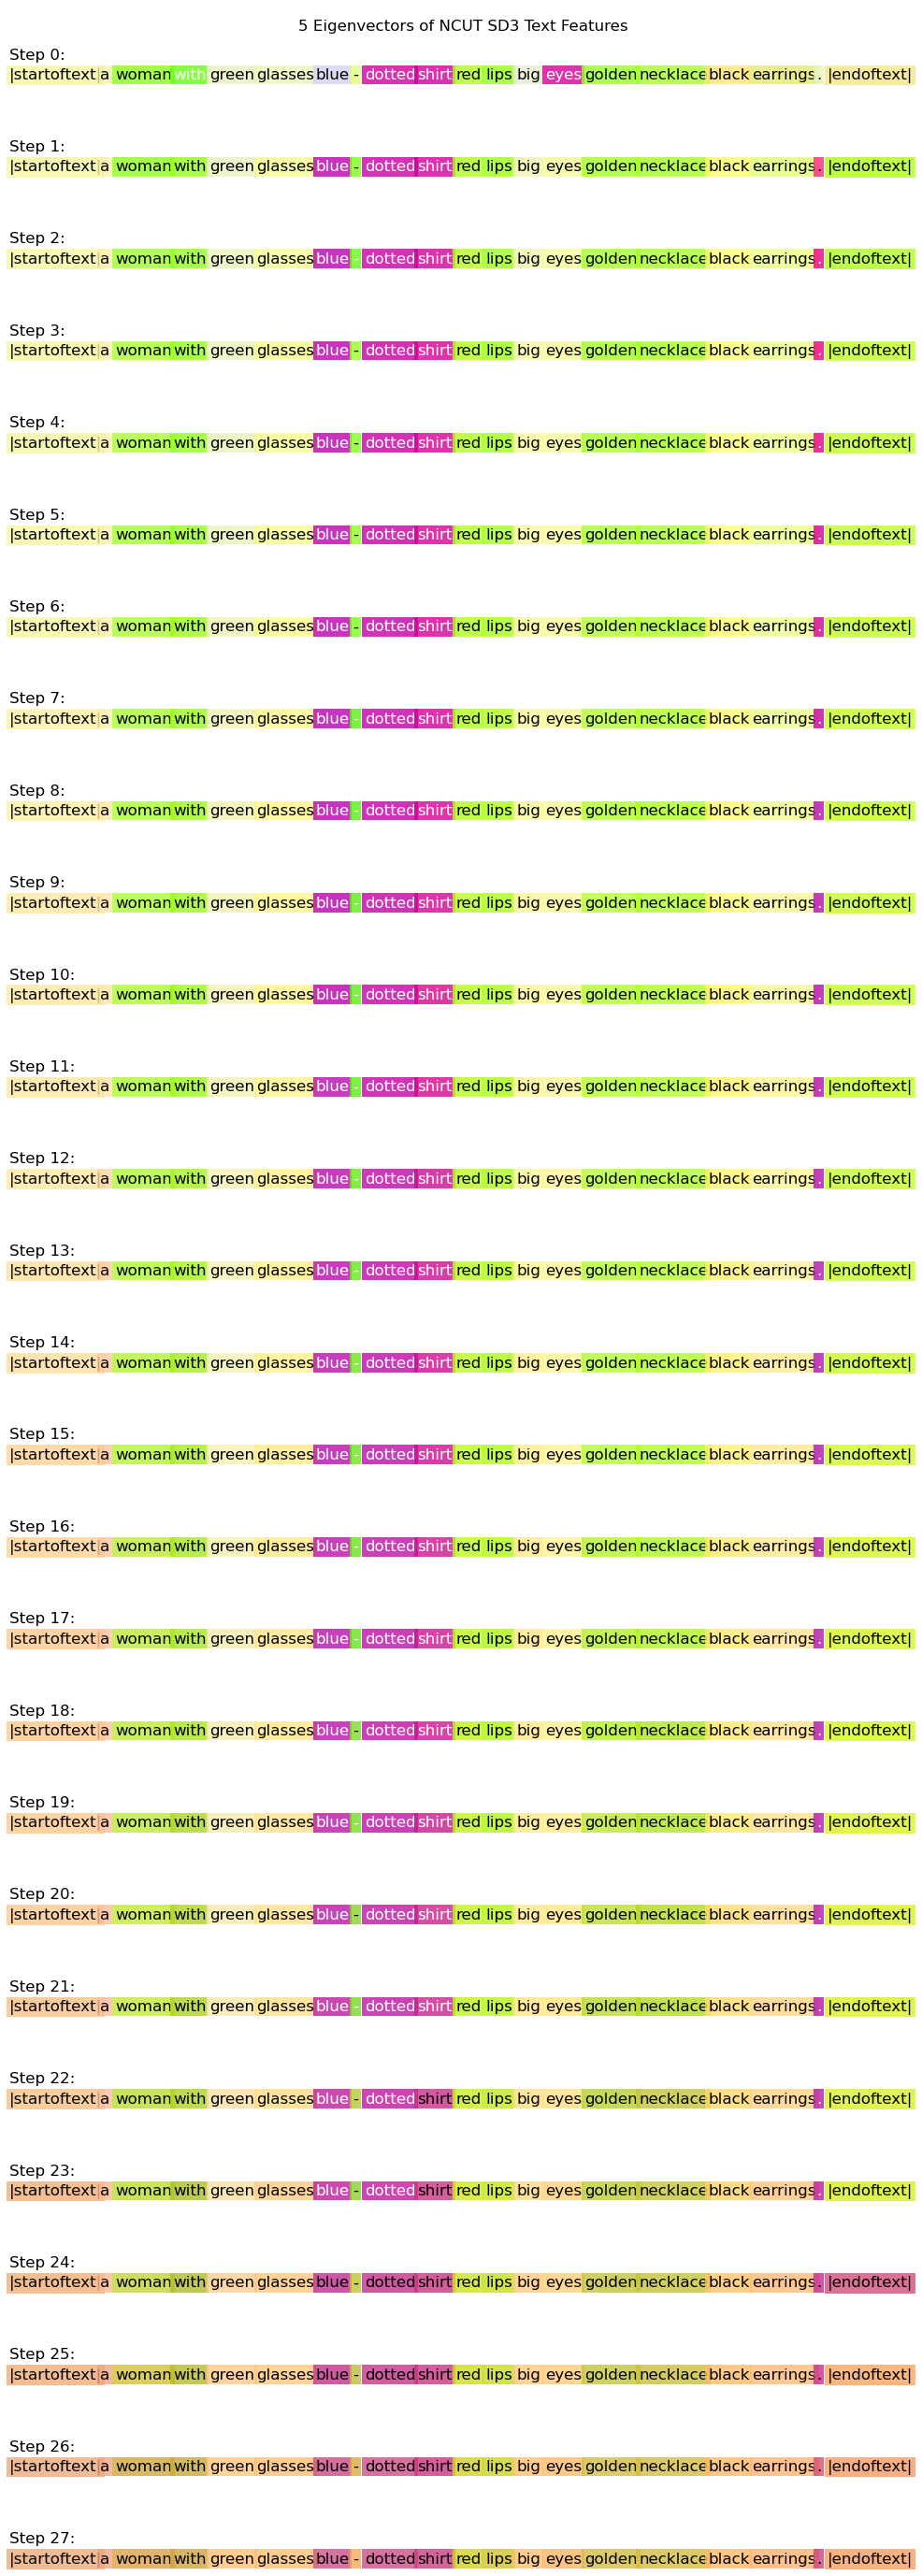

In [7]:
batch_no = 0
num_eig = 5
x_features = group_x_features(x_feature_maps, batch_no)
c_features = group_c_features(c_feature_maps, batch_no)
xc_features = torch.concat([x_features, c_features], dim=0) # [num_steps * (x_size + num_tokens), x_dim]
xc_eign_vec, xc_eign_val = ncut_features(xc_features, num_eig)
xc_3d, xc_rgb = rgb_from_tsne_3d(xc_eign_vec)
plot_3d(xc_3d,xc_rgb,f"{num_eig} Eigenvectors of NCUT SD3 Image and Text Features",num_nodes=num_steps * (x_size + num_tokens))
xc_x_features_rgb = xc_rgb[:num_steps*x_size].reshape(num_steps, x_height, x_width, 3).numpy()
xc_c_features_rgb = xc_rgb[num_steps*x_size:].reshape(num_steps, num_tokens, 3).numpy()
plot_images(xc_x_features_rgb, f"{num_eig} Eigenvectors of NCUT SD3 Image Features")
plot_texts(xc_c_features_rgb, tokens, f"{num_eig} Eigenvectors of NCUT SD3 Text Features")

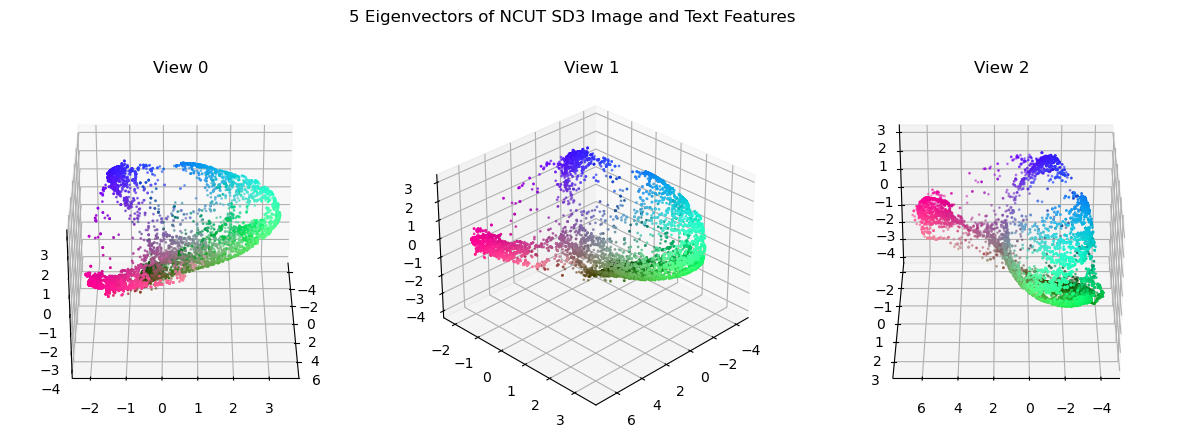

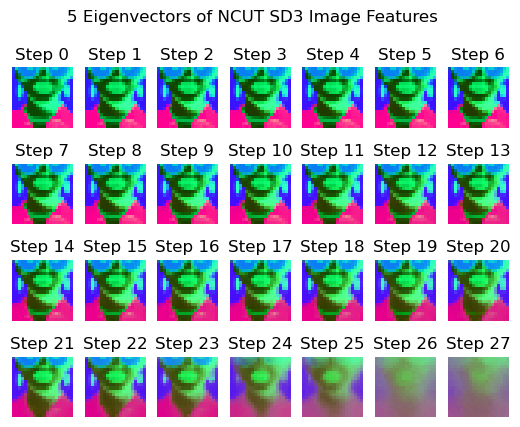

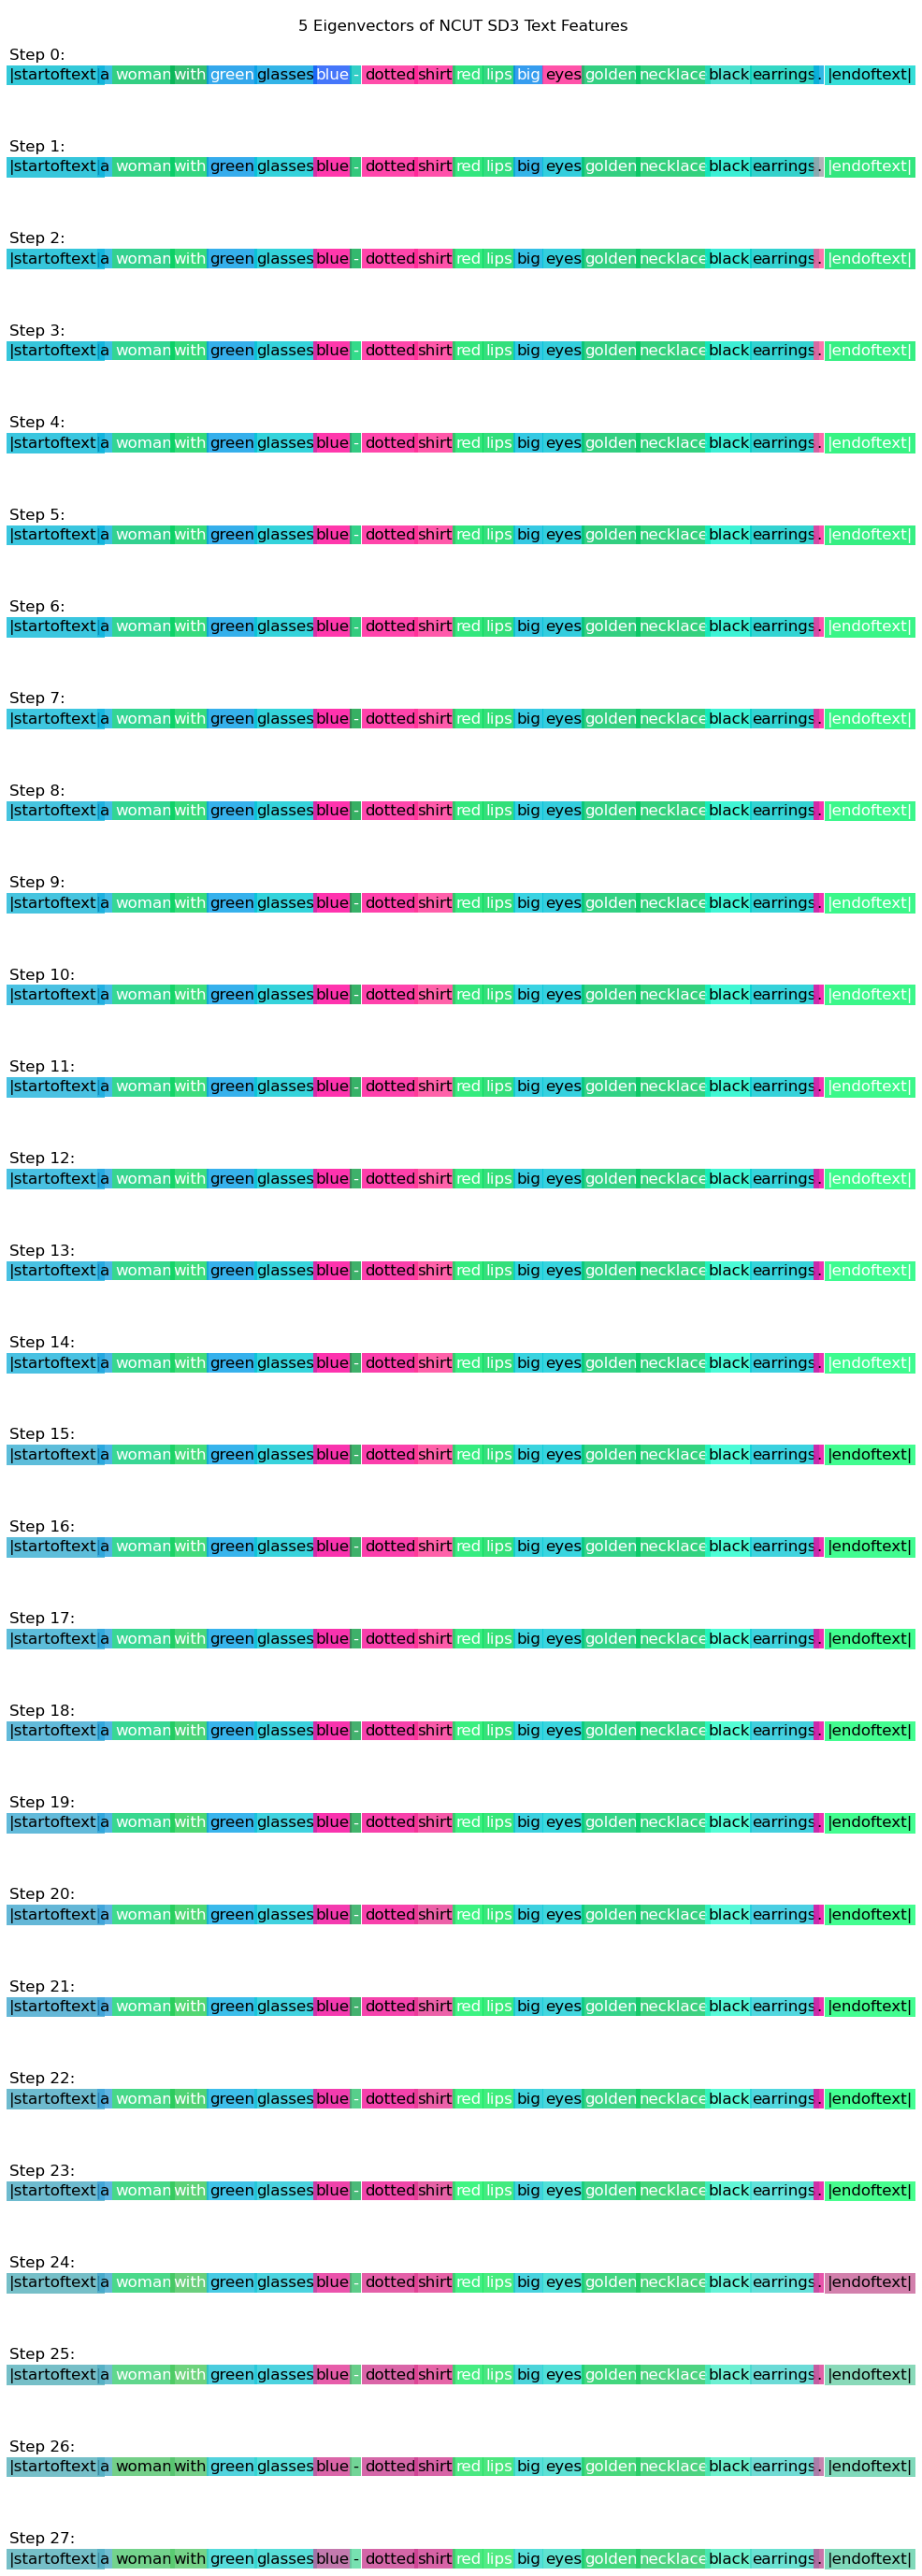

In [8]:
xc_features = None
num_eig = 5
for i in range(num_steps):
    x_feat_step = x_features[i*x_size:(i+1)*x_size] # [x_size, x_dim]
    c_feat_step = c_features[i*num_tokens:(i+1)*num_tokens] # [num_tokens, c_dim]
    xc_feat_step = torch.cat((x_feat_step, c_feat_step), dim=0) # [x_size + num_tokens, x_dim]
    if xc_features is None:
        xc_features = xc_feat_step
    else:
        xc_features = torch.cat((xc_features, xc_feat_step), dim=0) # [num_steps * (x_size + num_tokens), x_dim]

xc_eign_vec, xc_eign_val = ncut_features(xc_features, num_eig)
xc_3d, xc_rgb = rgb_from_tsne_3d(xc_eign_vec)
plot_3d(xc_3d,xc_rgb,f"{num_eig} Eigenvectors of NCUT SD3 Image and Text Features",num_nodes=num_steps * (x_size + num_tokens))

xc_x_features_rgb = None
xc_c_features_rgb = None
for i in range(num_steps):
    xc_x_feat_step = xc_rgb[i*(x_size+num_tokens):(i+1)*(x_size+num_tokens)][:x_size].reshape(x_height, x_width, 3).unsqueeze(0)
    xc_c_feat_step = xc_rgb[i*(x_size+num_tokens):(i+1)*(x_size+num_tokens)][x_size:].reshape(num_tokens, 3).unsqueeze(0)
    if xc_x_features_rgb is None:
        xc_x_features_rgb = xc_x_feat_step
    else:
        xc_x_features_rgb = torch.concat((xc_x_features_rgb, xc_x_feat_step), dim=0)
    if xc_c_features_rgb is None:
        xc_c_features_rgb = xc_c_feat_step
    else:
        xc_c_features_rgb = torch.concat((xc_c_features_rgb, xc_c_feat_step), dim=0)
xc_x_features_rgb = xc_x_features_rgb.numpy()
xc_c_features_rgb = xc_c_features_rgb.numpy()
plot_images(xc_x_features_rgb, f"{num_eig} Eigenvectors of NCUT SD3 Image Features")
plot_texts(xc_c_features_rgb, tokens, f"{num_eig} Eigenvectors of NCUT SD3 Text Features")